<a href="https://colab.research.google.com/github/lithiumpropeller/ML-For-Beginners/blob/main/Titanic_Survival_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the Librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the data
df = sns.load_dataset('titanic')
# Get the first 10 records of the dataset
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
# Total number of rows and columns in the dataset
df.shape

(891, 15)

In [ ]:
# Get the different statistical measures for numerical features
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Getting the count of people who survived and not survived
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

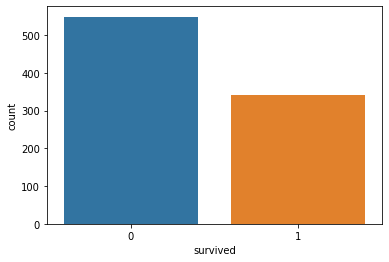

In [ ]:
#Visualize the count of number of survivors
sns.countplot(x='survived',data=df)

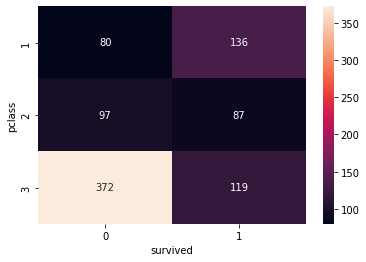

In [ ]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()

sns.heatmap(pclass_survived, annot = True, fmt ="d")

* The Heatmap above tells us that people who travelled in Class 1 have a higher survival rate than the other 2 lower classes.Thus, we can sat that PClass is an important feature since the person travelling in a higher class have a higher chance of survival.
* Here we can clearly see that people who did not survive are majorly from Class 3.

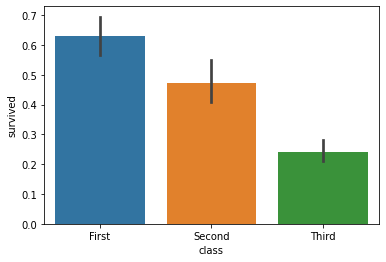

In [ ]:
#Plot the survival rate of each class.
sns.barplot(x='class', y='survived', data=df)

* From this Barplot we can say that nearly **60%** of the people who travelled in First Class survived and as the Class goes down the survival chance also keeps getting low.

In [ ]:
# Pivot Table to summarize few columns
pd.pivot_table(df,index='survived',values=['age','fare','parch'],aggfunc='mean')

,age,fare,parch
survived,,,
0,30.626179,22.117887,0.329690
1,28.343690,48.395408,0.464912


#### From this Pivot Table we can infer following things:<br>
* The average age of survivors is 28, so young people tend to survive more.
* People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class which again confirms our earlier heatmap visualisation.
* In the 3rd column, if you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates.

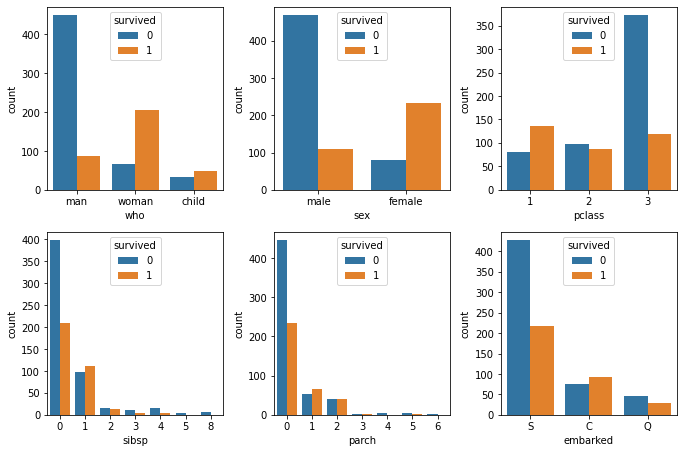

In [ ]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols=['who', 'sex', 'pclass', 'sibsp', 'parch','embarked']
# Setting the figuresize to have a better visualisation
plt.figure(figsize=(9.6,6.4))
a=1  # Setting the index
for i in range(len(cols)):
  plt.subplot(2,3,a)
  sns.countplot(x=df[cols[i]],hue=df['survived'])
  plt.legend(title='survived',loc='upper center')
  a+=1
plt.tight_layout()  #tight_layout

* From the charts above, we can see that a man (a male 18 or older) is not likely to survive from the chart <mark>who</mark>.
* Females are most likely to survive from the chart <mark>sex</mark>.
* Third class is most likely to not survive by chart <mark>pclass</mark>.This is consisten with our earlier heatmap visualisation.
* If you have 0 siblings or spouses on board, you are not likely to survive according to chart <mark>sibsp</mark>.
* If you have 0 parents or children on board, you are not likely to survive according to the <mark>parch</mark> chart.From the Pivot Table also we got the same conclusion so people who went with their parents had a higher chance of survival.
* If you embarked from Southampton (S), you are not likely to survive according to the <mark>embarked</mark> chart.

We saw that Female are more likely to survive than the Male.<br>
Let's get the % survival rate of both the genders by using groupby function.

In [ ]:
# Survival Rate by Sex
df.groupby('sex')[['survived']].mean()*100

,survived
sex,
female,74.203822
male,18.890815


From the table above, we can see that about **74.2%** of females survived and only **18.89%** of males survived.

---
* Now we look at the Survival Rate of the Sex who are in the different classes since we saw that the person in first class has a better survival chance compared to the one in third class.
* For this we would use the pivot_table() function from the pandas library.

In [ ]:
#Look at survival rate by sex and class
df.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


* From the pivot table above, we see that **females in first class and second class had a survival rate of about 96.8% and 92%** respectively, meaning the majority of them survived.
* Whereas **males in second and third class had survival rate of about 15.74% and 15.74%** respectively, meaning the majority of them did not survive.

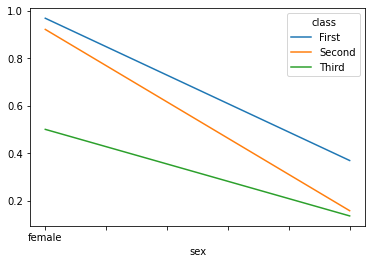

In [ ]:
#Look at survival rate by sex and class visually
df.pivot_table('survived', index='sex', columns='class').plot()

---
* We can see from the table below that women in first class that were above 18 had the highest survival rate at 97.2973%, while men 18 and older in second class had the lowest survival rate of 7.1429%.
* For the age group below 18 among Female all from second class survived and had 100% survival rate whereas among Male third class had the worst survival rate of about 21.5%

In [ ]:
# Survival rate on the basis of age, gender & class

age = pd.cut(df['age'], [0,18,80]) 

df.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

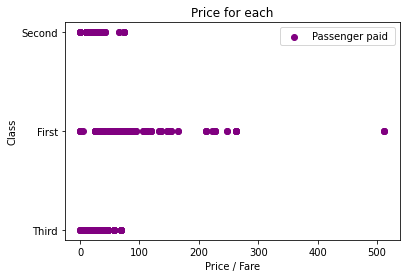

In [ ]:
# Price paid for each class

plt.scatter(df['fare'], df['class'], color = 'purple', label = 'Passenger paid ')
plt.xlabel('Price / Fare')
plt.ylabel('Class')
plt.title('Price for each')
plt.legend()
plt.show()

* From the above Scatter Plot we can see that the fare is widely spread only in the First Class and for Class Second and Third the fare is somehere between 0 to 100.
* The highest fare paid by any passenger is around 500 from the looks of the plot.

In [ ]:
# checking number of missing vakue of each columns 

df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Imputing the null values of the Age column of the dataset with the mean Age value across all the 3 Classes.

In [ ]:
# Average age based on the Class the people travelled
group_class=df.groupby(['pclass'])['age'].mean()
# Average age across the 3 classes is given by:
round(group_class.mean(),2)

31.08

In [ ]:
# Filling the Age Column with average age across the 3 classes
df['age'] = df['age'].fillna(group_class.mean())
df.age.isna().sum()

0

To show some of the redundant columns, let's take a look at each column’s value count and name.

In [ ]:
# Count the values of each columns 

for val in df:
    print(val.upper())
    print()
    print(df[val].value_counts())
    print()

SURVIVED

0    549
1    342
Name: survived, dtype: int64

PCLASS

3    491
1    216
2    184
Name: pclass, dtype: int64

SEX

male      577
female    314
Name: sex, dtype: int64

AGE

31.083897    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: age, Length: 89, dtype: int64

SIBSP

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

PARCH

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

FARE

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

EMBARKED

S    644
C    168
Q     77
Name: embarked, dtype: int64

CLASS

Third     491
First     216
Second    184
Name: class, dtype: int64

WHO

man      537
woman    271
child     83
Name: who, d

* Next, we will drop the redundant columns that are non-numerical and remove rows with missing values.
* Some of the redundant columns here are Alive which is similar to Survived but instead of numbers we have True or False so we can drop this column.
* Similarly we have columns like Alone,Class,Adult_Male,Who where the data is in categorical format of already available numerical data type so we can remove this features to reduce the correlation and also reduce the task of encoding the categorical features.
* The "Deck" column is here dropped because we have almost 80% of data as NaN so we can simply drop that column as it isnt an important feature.


In [ ]:
# Drop the columns
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

#Remove the rows with missing values
df = df.dropna(subset =['embarked'])

In [ ]:
#Count the NEW number of rows and columns in the data set
df.shape

(889, 8)

In [ ]:
# Look at the data type of the data frame to see which column needs to be encoded
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

So here we have 2 features i.e sex and embarked which are non numerical and needs to be converted to numerical type.

In [ ]:
#Print the unique values in the columns
print(df['sex'].unique())
print(df['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


For encoding this categorical features we would use sklearn library and in that use LabelEncoder for encoding them to numerical feautres

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

#Encode sex column
df.iloc[:,2]= labelencoder.fit_transform(df.iloc[:,2].values)

#Encode embarked
df.iloc[:,7]= labelencoder.fit_transform(df.iloc[:,7].values)

#Print the NEW unique values in the columns
print(df['sex'].unique())
print(df['embarked'].unique())

[1 0]
[2 0 1]


* We are done with Exploratory Data Analysis(EDA),Data Visualisation and Data Cleaning process
* Now we can start building different models for our dataset and see how each model performs using evaluation metrics.
* For this purpose we would first have to split our dataset into Training and Testing Data so that we can check how our model performs when it sees unknown data values.

In [ ]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:8].values 
Y = df['survived'].values

* After separating the Target and the Features, we can scale the features to a single scale to make sure that any single feature which has higher values in magnitude do not dominate the machine learning model.
* For this we would use the StandardScaler object from the sklearn library to bring our features to the same scale.

In [ ]:
# Scaled the data to avoid some variable to dominates

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

* We would write a function now which would take X_train and Y_train as parameters
* In this function block we would train the different ML models to predict whether or not a assenger survives. 
* This function also provides the training score for the different models to compare which is the best model for our dataset. 

In [ ]:
# Creat a function with many machine leraning models 

def models(X_train, Y_train):
    
    #Logistic regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(solver = 'lbfgs')
    log.fit(X_train,Y_train)
    
    # Use KNeighbors 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p =2)
    knn.fit(X_train,Y_train)
    
    #Use SVC (linear model)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0, gamma = 'auto')
    svc_lin.fit(X_train,Y_train)
    
    # Use SVc (RBF Kernal)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0, gamma = 'auto')
    svc_rbf.fit(X_train,Y_train)
    
    # Use gaussianNB
    from sklearn.naive_bayes import GaussianNB
    guss = GaussianNB()
    guss.fit(X_train,Y_train)
    
    # Use decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train,Y_train)
    
    # Use Random forest 
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=  10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train,Y_train)
    
    
    # Print the training accuracy score
    print('[0] Logistic Regression Score : ', log.score(X_train,Y_train))
    print('[1] K Neighbors Score : ', knn.score(X_train,Y_train))
    print('[2] SVM (Linear) Score : ', svc_lin.score(X_train,Y_train))
    print('[3] SVM (RBF) Score : ', svc_rbf.score(X_train,Y_train))
    print('[4] Guassian NB Score : ', guss.score(X_train,Y_train))
    print('[5] Decision tree : ', tree.score(X_train,Y_train))
    print('[6] Random forest :', forest.score(X_train,Y_train))
    
    
    return log, knn, svc_lin, svc_rbf, guss, tree, forest

In [ ]:
#Get and train all of the models
model = models(X_train,Y_train)

[0] Logistic Regression Score :  0.819971870604782
[1] K Neighbors Score :  0.8804500703234881
[2] SVM (Linear) Score :  0.8073136427566807
[3] SVM (RBF) Score :  0.8579465541490858
[4] Guassian NB Score :  0.8157524613220816
[5] Decision tree :  0.9845288326300985
[6] Rndom forest : 0.9662447257383966


From the training score it seems that **Decision Tree** is the most accurate model as its accuracy-score is approximately around 98.45%.

In [ ]:
# Create a Confusuion Matrix for checking the accuracy on Test Data and see which model gives the best accuracy

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    # Extract TN, FP, FN, TP 
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score = ( TP +TN ) / ( TP + TN + FP + FN )
    
    print(cm)
    print('Model [{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[84 21]
 [30 43]]
Model [0] Testing Accuracy = "0.7134831460674157"

[[85 20]
 [29 44]]
Model [1] Testing Accuracy = "0.7247191011235955"

[[85 20]
 [30 43]]
Model [2] Testing Accuracy = "0.7191011235955056"

[[88 17]
 [29 44]]
Model [3] Testing Accuracy = "0.7415730337078652"

[[79 26]
 [26 47]]
Model [4] Testing Accuracy = "0.7078651685393258"

[[88 17]
 [23 50]]
Model [5] Testing Accuracy = "0.7752808988764045"

[[91 14]
 [29 44]]
Model [6] Testing Accuracy = "0.7584269662921348"



* Here on Testing data as well we see that the Decision Tree gives the best accuracy of around 77.5%.
* Since we are getting the highest score using Decision Tree in both Training and Testing data,we would use the Decision Tree Model to predict whether someone would survive or not by providing the values to the model.


In [ ]:
# Get features importance 
tree = model[5] # selecting the Decision Tree Model for Prediction
importances = pd.DataFrame({'feature': df.iloc[:,1:8].columns, 'importance': np.round(tree.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
sex,0.267
fare,0.262
age,0.252
pclass,0.108
parch,0.043
sibsp,0.039
embarked,0.028


Let's plot a Barplot between the features and their respective importance factor.

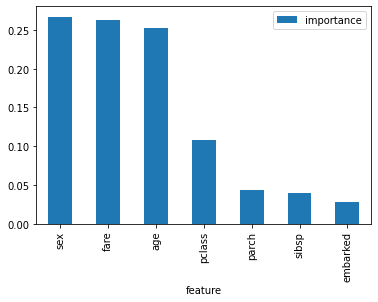

In [ ]:
importances.plot.bar()

We can see that the the features "Sex","Fare" and "Age" have almost similar importance and its somewhat true as well as we found out during the EDA as well that the survival rate depended a lot on this features. 

In [ ]:
#Print Prediction of Decision Tree Classifier model
pred = tree.predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1]

[0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1]


Now that we have analyzed the data, created our models, and chosen a model to predict who would’ve survived the Titanic, let’s test and see if I would have survived.

In [ ]:
my_survival = [[2,1,25,0, 0, 50, 1]]
# Scaling my survival
my_survival_scaled = sc.fit_transform(my_survival)

#Print Prediction of Decision Tree Classifier model
pred = model[5].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('Oh no! You didn\'t make it')
else:
  print('Nice! You survived')

[0]
Oh no! You didn't make it
